**ONLİNE SALES ANALYSIS**

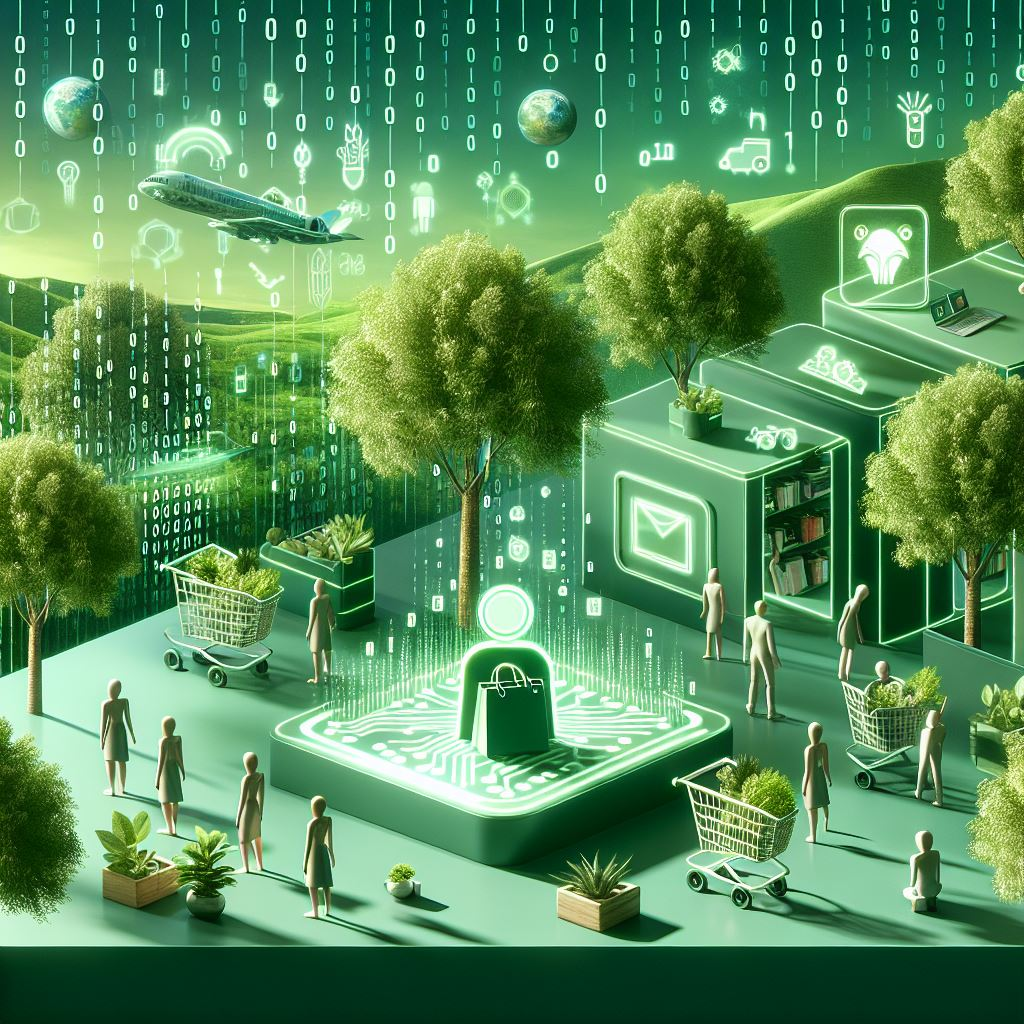

**About the Dataset**

**Definition:** The dataset contains anonymized data related to online sales transactions, capturing various aspects of product purchases, customer details, and order characteristics.
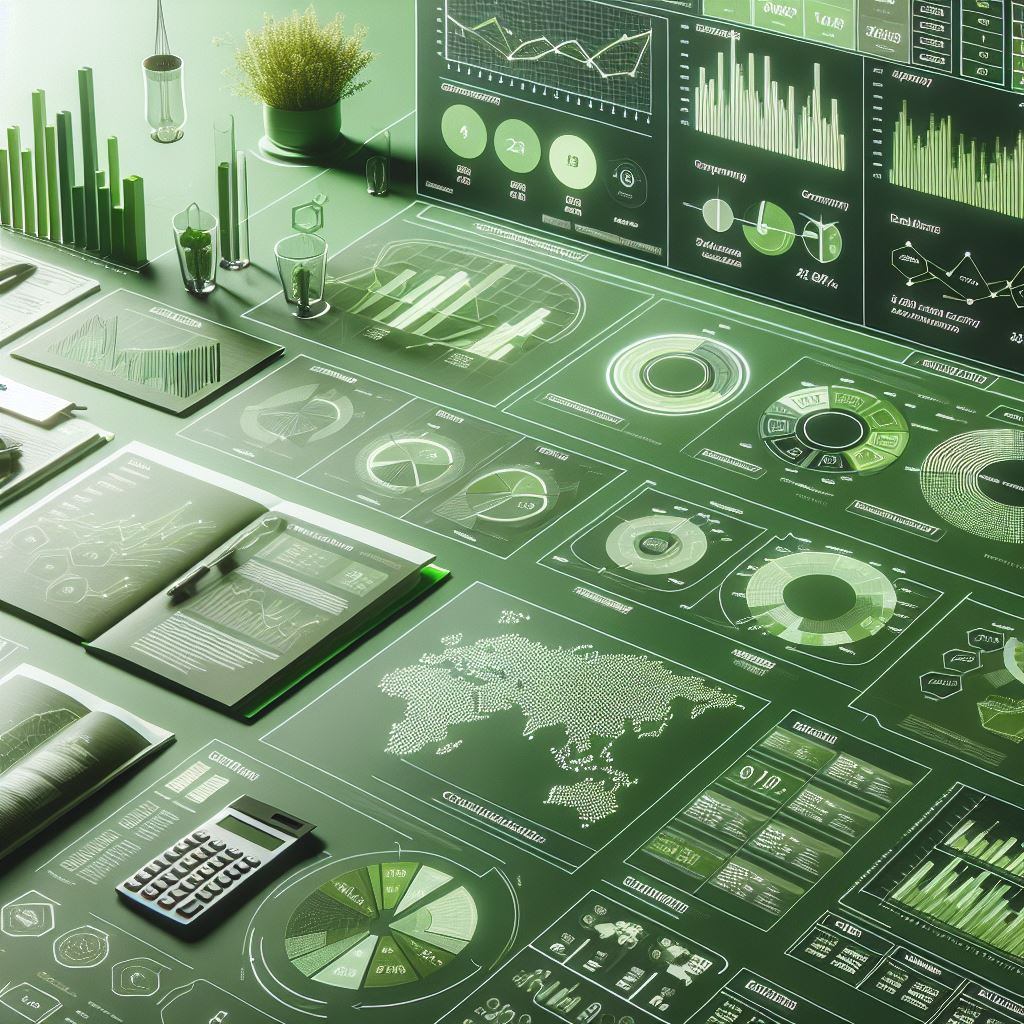

**Importing Libraries**

In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from plotly.offline import plot
import random

**EDA - EXPLORATORY DATA ANALYSİS**

In [3]:
data=pd.read_csv("/kaggle/input/online-sales-dataset/online_sales_dataset.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [5]:
print(data.info())
print(data.shape)
print(data.describe())
print(data.columns)
data.columns = data.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [33]:
data.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

**DATA CLEANİNG AND PREPROCESSİNG**

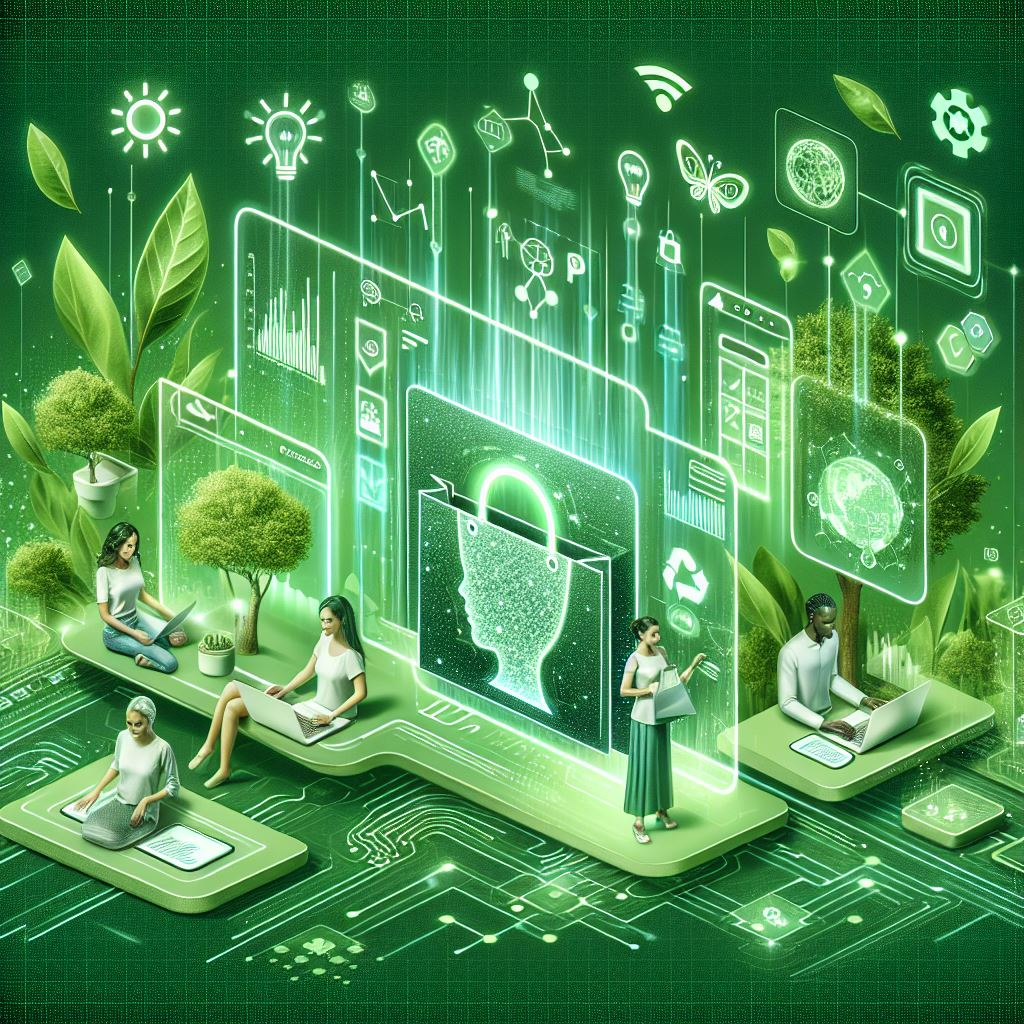

In [6]:
df = pd.DataFrame(data)
print("Orijinal DataFrame:")
print(df)

Orijinal DataFrame:
       InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0         221958  SKU_1964     White Mug        38  2020-01-01 00:00   
1         771155  SKU_1241     White Mug        18  2020-01-01 01:00   
2         231932  SKU_1501    Headphones        49  2020-01-01 02:00   
3         465838  SKU_1760     Desk Lamp        14  2020-01-01 03:00   
4         359178  SKU_1386     USB Cable       -30  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777     354083  SKU_1562      Blue Pen        25  2025-09-05 01:00   
49778     296698  SKU_1930     USB Cable         7  2025-09-05 02:00   
49779     177622  SKU_1766  Office Chair        43  2025-09-05 03:00   
49780     701213  SKU_1602      Notebook        48  2025-09-05 04:00   
49781     772215  SKU_1832     White Mug        30  2025-09-05 05:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  \
0           1.71     37039.0       Austral

In [34]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
    return df_missing

In [35]:
# Add 2% missing values to the DataFrame.
df_with_missing = add_random_missing_values(df, missing_rate=0.02)

print("\nDataFrame with Missing Values Added:")
print(df_with_missing)


DataFrame with Missing Values Added:
       InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0       221958.0  SKU_1964     White Mug      38.0  2020-01-01 00:00   
1       771155.0  SKU_1241     White Mug      18.0  2020-01-01 01:00   
2       231932.0  SKU_1501    Headphones      49.0  2020-01-01 02:00   
3       465838.0  SKU_1760     Desk Lamp      14.0  2020-01-01 03:00   
4       359178.0  SKU_1386     USB Cable     -30.0  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777   354083.0  SKU_1562      Blue Pen      25.0  2025-09-05 01:00   
49778   296698.0  SKU_1930    Wall Clock       7.0  2025-09-05 02:00   
49779   177622.0  SKU_1766  Office Chair      43.0  2025-09-05 03:00   
49780   701213.0  SKU_1602      Notebook      48.0               NaN   
49781   772215.0  SKU_1832     White Mug      30.0  2025-09-05 05:00   

       UnitPrice    CustomerID         Country  Discount  PaymentMethod  ...  \
0           1.71 

In [36]:
print(df_with_missing.isnull().sum())
print(df_with_missing.info())
print(df_with_missing.shape)
print(df_with_missing.describe())
print(df_with_missing.columns)
df_with_missing.columns = (df_with_missing.columns.str.strip())

InvoiceNo             946
StockCode            1010
Description           967
Quantity              977
InvoiceDate          1030
UnitPrice             989
CustomerID            968
Country               959
Discount              957
PaymentMethod         972
ShippingCost         1007
Category             1002
SalesChannel         1049
ReturnStatus         1006
ShipmentProvider      954
WarehouseLocation     981
OrderPriority         985
Sales                 973
Netprofit             941
Year                  999
Month                1036
Month_name            994
Day                  1010
Day_name              975
Quater                967
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          48836 non-null  float64
 1   StockCode          48772 non-null  object 
 2   Description        48815 non-nu

In [37]:
# For numeric columns, fill missing values with the average
numeric_columns = df_with_missing.select_dtypes(include=['int64', 'float64']).columns
df_with_missing[numeric_columns] = df_with_missing[numeric_columns].fillna(df_with_missing[numeric_columns].mean())

# Fill missing values with mode for categorical columns
categorical_columns = df_with_missing.select_dtypes(include=['object']).columns
df_with_missing[categorical_columns] = df_with_missing[categorical_columns].fillna(df_with_missing[categorical_columns].mode().iloc[0])

# Let's check again after the missing data has been cleared
df_missing_after = df_with_missing.isnull().sum().sum()
df = df_with_missing
print(df)

       InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0       221958.0  SKU_1964     White Mug      38.0  2020-01-01 00:00   
1       771155.0  SKU_1241     White Mug      18.0  2020-01-01 01:00   
2       231932.0  SKU_1501    Headphones      49.0  2020-01-01 02:00   
3       465838.0  SKU_1760     Desk Lamp      14.0  2020-01-01 03:00   
4       359178.0  SKU_1386     USB Cable     -30.0  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777   354083.0  SKU_1562      Blue Pen      25.0  2025-09-05 01:00   
49778   296698.0  SKU_1930    Wall Clock       7.0  2025-09-05 02:00   
49779   177622.0  SKU_1766  Office Chair      43.0  2025-09-05 03:00   
49780   701213.0  SKU_1602      Notebook      48.0  2020-01-01 00:00   
49781   772215.0  SKU_1832     White Mug      30.0  2025-09-05 05:00   

       UnitPrice    CustomerID         Country  Discount  PaymentMethod  ...  \
0           1.71  37039.000000       Australia  0.47000

In [13]:
print(df.isnull().sum())
print(df.describe())


InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64
           InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   49782.000000  49782.000000  49782.000000  49782.000000  49782.000000   
mean   550387.334980     22.382225     47.521594  55041.769036      0.275721   
std    257922.976588     17.742773     33.179636  24341.607268      0.227466   
min    100005.000000    -50.000000    -99.980000  10001.000000      0.000000   
25%    329189.750000     11.000000     24.082500  35707.000000      0.130000   
50%    550387.334980     23.000000     47.940000  55041.769036      0.260000   
75%    770900.500000     36.000000  

**STATİSTİCAL ANALYSİS AND VİSUALİZATİON**

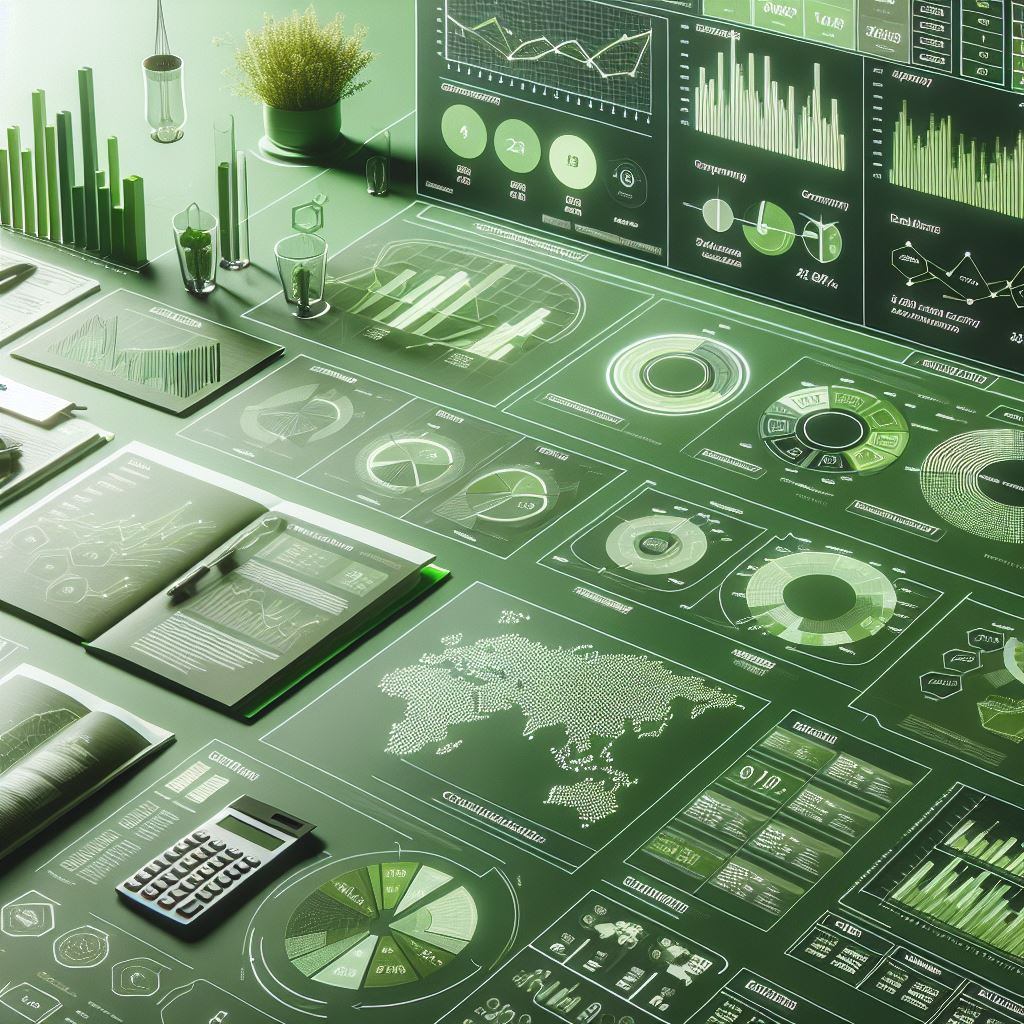

1. **Statistical Summary of the Data Set**
   
**Objective**:
To quickly analyze general trends and differences between variables by visualizing basic statistics (mean, minimum, maximum, etc.) of numeric columns.

<Axes: >

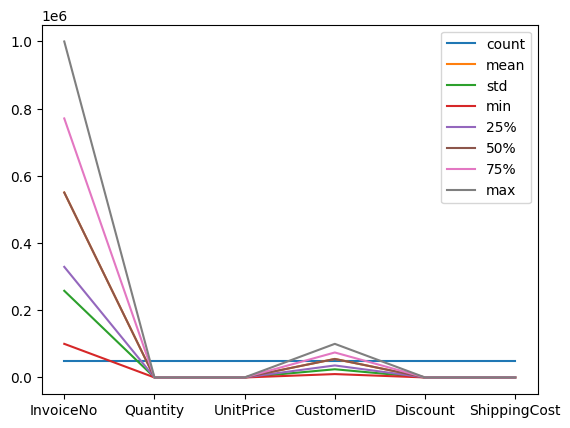

In [14]:
df.describe().T.plot(kind='line')

2. **Correlation Heat Map**
   
**Objective**:
To identify positive and negative correlations by visualizing the relationship between numerical variables, thereby identifying strong links or independent variables in the data set.

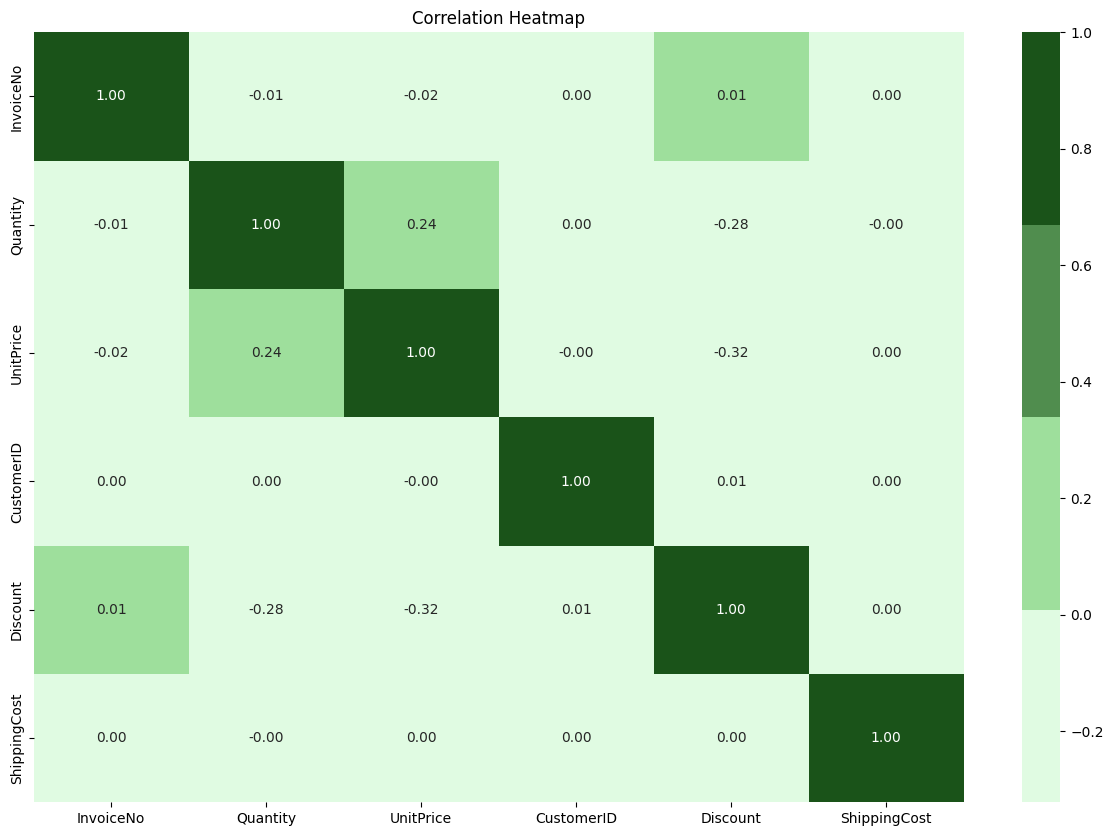

In [15]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap=["#E0FBE2","#9EDF9C","#508D4E","#1A5319"])
plt.title('Correlation Heatmap')
plt.show()


**Results**: The columns with the highest correlation are “InvoiceNo-Discount” and “Quantity-UnitPrice”

3. **Top 10 Best-Selling Products**
**Objective**e: To determine the best-selling products.

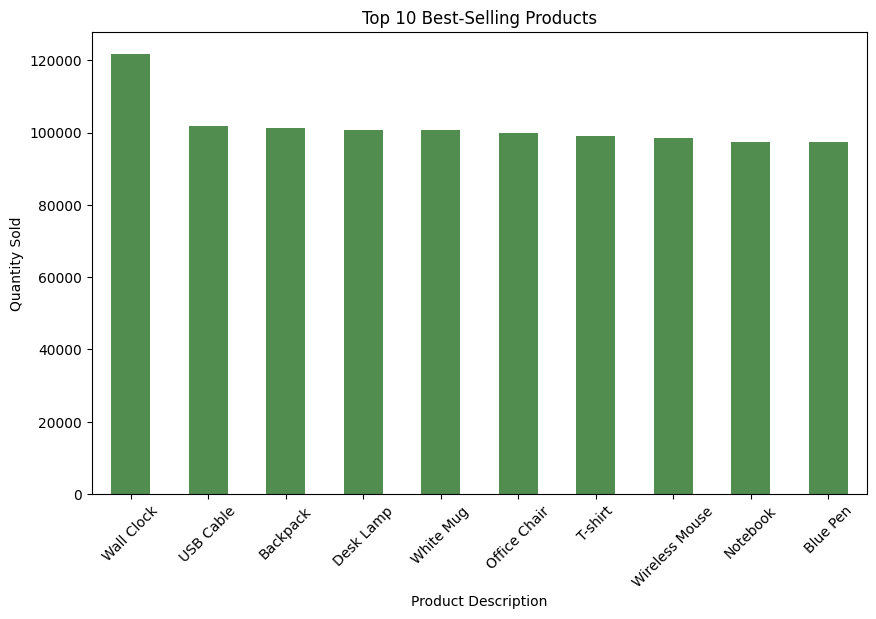

In [16]:
# Top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='#508D4E')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

**Results**: Best-selling product Wall Clock

4. **Payment Method Distribution**
   
**Objective**:
To analyze users' preferred payment methods by visualizing the usage rates of payment methods in the dataset in terms of percentages.

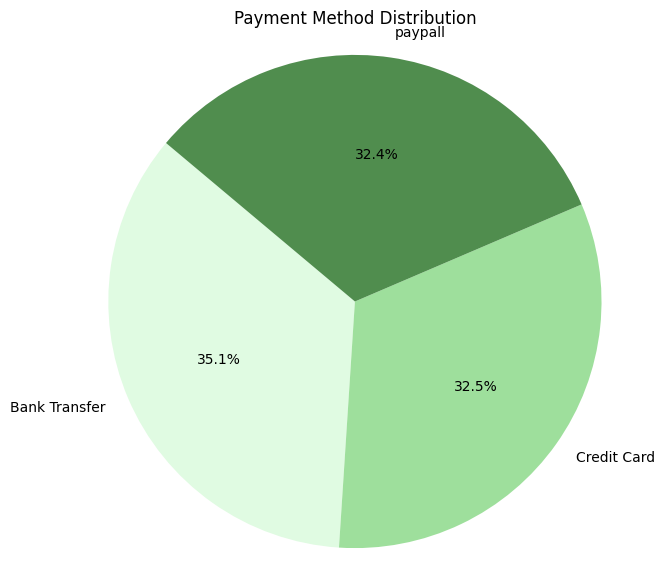

In [17]:
payment_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#E0FBE2","#9EDF9C","#508D4E","#1A5319"])
plt.title('Payment Method Distribution')
plt.axis('equal')  

plt.show()

**Results**: Bank Transfer is the most preferred payment method. Credit Card and Paypall are almost equally preferred.

5. **Sales Breakdown by Sales Channels**
   
**Objective**:
To analyze which channels generate the highest revenue by visualizing the percentage share of sales channels in total sales.

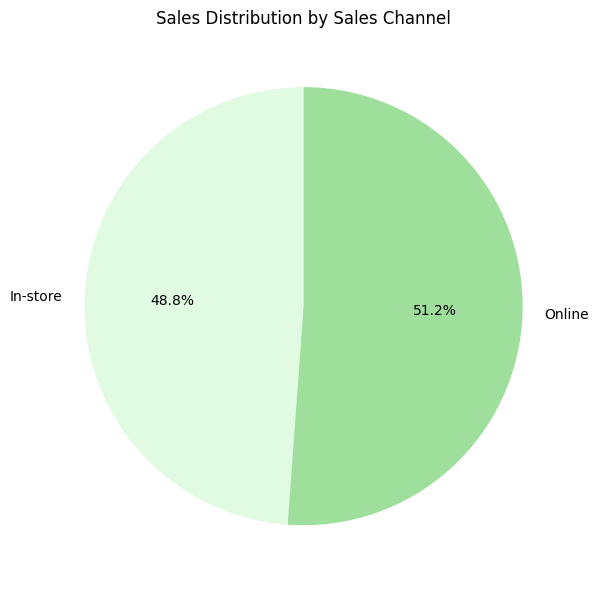

In [18]:
df['Sales'] = (df['UnitPrice'] * df['Quantity'] * (1 - df['Discount'])) + df['ShippingCost']
df_totalsales=df['Sales'].sum()
df_totalsales.round(1)

sales_by_channel = df.groupby('SalesChannel')['Sales'].sum()

plt.figure(figsize=(8, 6))
plt.pie(sales_by_channel, labels=sales_by_channel.index, autopct='%1.1f%%', startangle=90, colors=["#E0FBE2","#9EDF9C","#508D4E","#1A5319"])

plt.title('Sales Distribution by Sales Channel')

plt.tight_layout()
plt.show()

**Results**: Online sales channels were more preferred.

6. **Total Sales Breakdown by Category**
   
**Objective**:
To analyze the total sales of products in different categories and identify the categories with the highest sales value. The visualization clearly shows the amount of sales for each category.

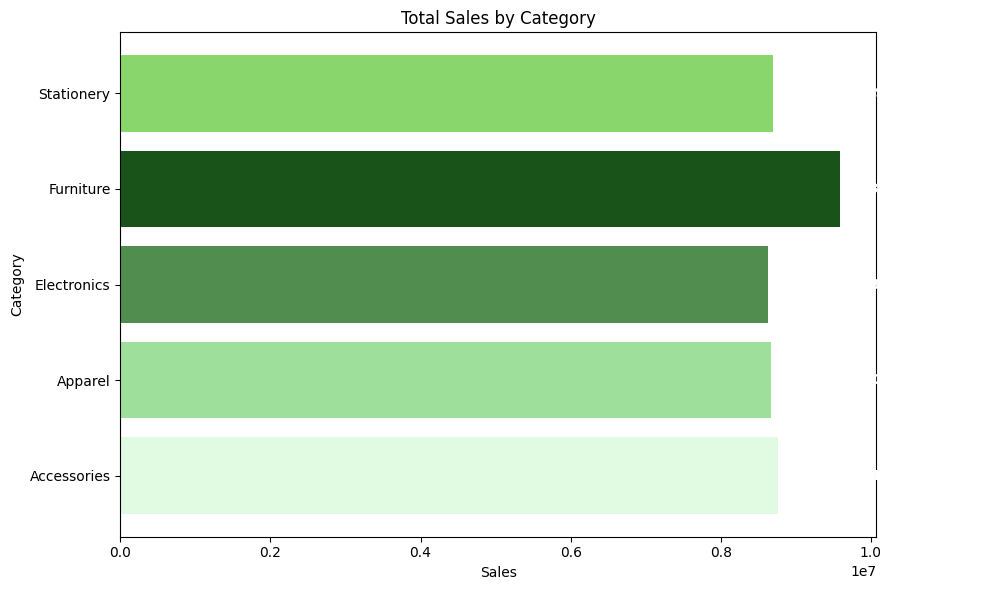

In [21]:
grouped_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.barh(grouped_sales['Category'], grouped_sales['Sales'], color=["#E0FBE2","#9EDF9C","#508D4E","#1A5319",'#88D66C'])

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (i.e., sales value)
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', ha='left', color='white', fontweight='bold')

plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()

plt.show()

7. **Total Profit Breakdown by Category**
   
**Objective**:
To identify the most profitable product categories for the business by analyzing the net profit values for each category. The visualization clearly presents the total amount of profit by category.

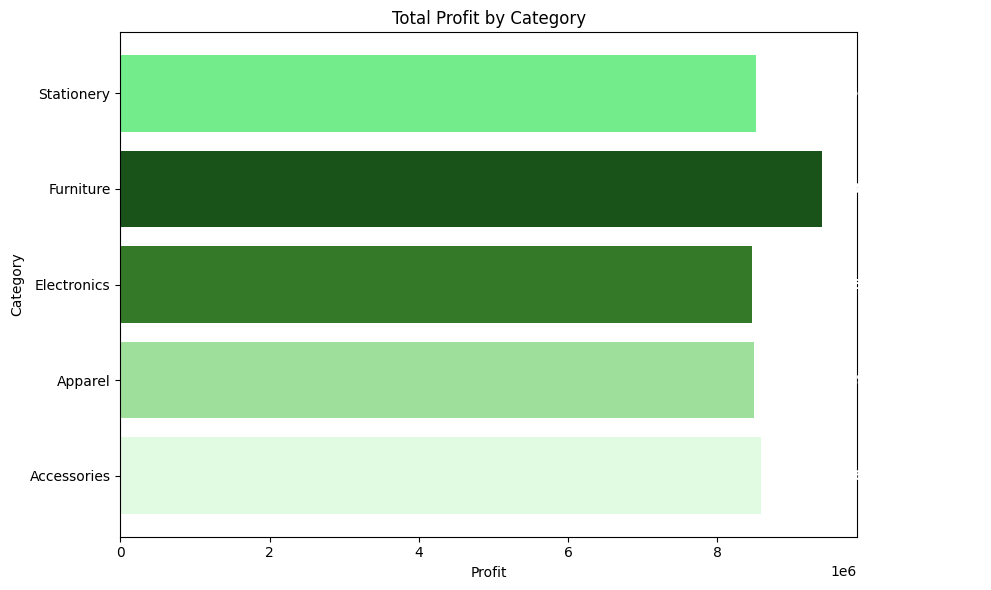

In [22]:
df['Netprofit'] = df['Sales'] - df['ShippingCost']
df_profit=df['Netprofit'].sum()

grouped_profit = df.groupby('Category')['Netprofit'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.barh(grouped_profit['Category'], grouped_profit['Netprofit'], color=["#E0FBE2","#9EDF9C","#347928","#1A5319",'#73EC8B'])

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (i.e., profit value)
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', ha='left', color='white', fontweight='bold')

plt.title('Total Profit by Category')
plt.xlabel('Profit')
plt.ylabel('Category')
plt.tight_layout()

plt.show()

8. **Time Based Analysis of Sales by Invoice Date**
   
**Objective**:
To analyze sales data in more detail by subdividing invoice dates into year, month, day, etc.

* **Pivot Table**: Group-based summary to analyze total monthly sales.

* **Line Chart**: Visualize sales trends over the years to show changes over time.

                   Sales
Month_name              
April       3.821632e+06
August      3.878567e+06
December    3.237770e+06
February    3.535897e+06
January     4.761123e+06
July        3.871680e+06
June        3.724106e+06
March       3.901567e+06
May         3.838175e+06
November    3.207474e+06
October     3.287066e+06
September   3.278579e+06


<Axes: xlabel='Year', ylabel='Sales'>

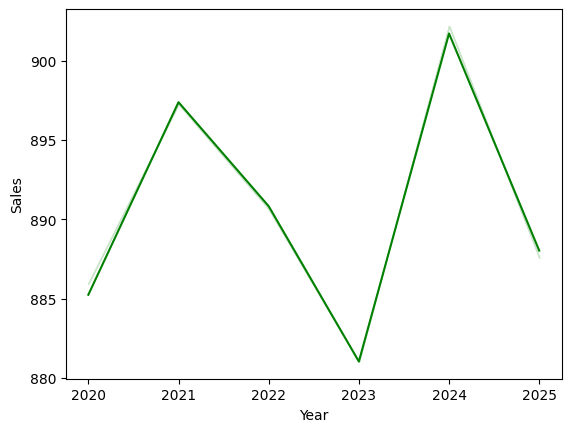

In [23]:
# Dealing with invoice date columns
df["Year"]=pd.to_datetime(df["InvoiceDate"]).dt.year
df["Month"]=pd.to_datetime(df["InvoiceDate"]).dt.month
df["Month_name"]=pd.to_datetime(df["InvoiceDate"]).dt.month_name()
df["Day"]=pd.to_datetime(df["InvoiceDate"]).dt.day
df["Day_name"]=pd.to_datetime(df["InvoiceDate"]).dt.day_name()
df["Quater"]=pd.to_datetime(df["InvoiceDate"]).dt.quarter

print(df.groupby(["Month_name"])[["Sales"]].sum()) 
sns.lineplot(x=df["Year"],y=df["Sales"],ci=False,color="green")

9.**Sales Breakdown by Month**

**Objective**:
To analyze sales data on a monthly basis to visualize which months have the highest sales.

**Summary Table**: Total sales by month.

**Bar Chart**: Highlight the difference in performance between months by visualizing the sales amount of each month.

                   Sales
Month_name              
April       3.821632e+06
August      3.878567e+06
December    3.237770e+06
February    3.535897e+06
January     4.761123e+06
July        3.871680e+06
June        3.724106e+06
March       3.901567e+06
May         3.838175e+06
November    3.207474e+06
October     3.287066e+06
September   3.278579e+06


<Axes: xlabel='Month_name'>

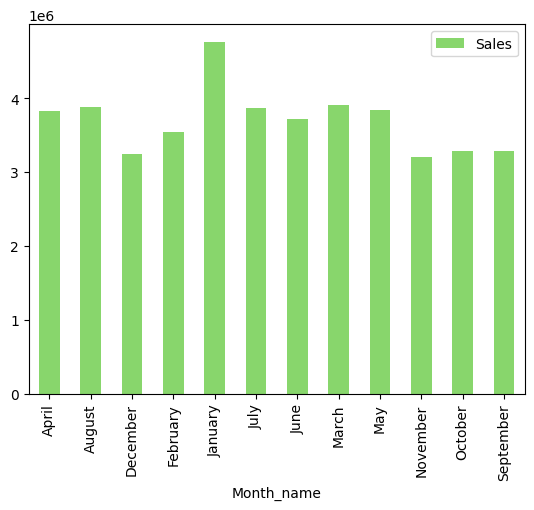

In [24]:
print(df.groupby(["Month_name"])[["Sales"]].sum()) 
df.groupby(["Month_name"])[["Sales"]].sum().plot(kind="bar",color=['#88D66C'])

10. **Year-Month Sales and Net Profit**
     
**Objective**:
To analyze sales and net profit performance on an annual and monthly basis and to visualize sales and profit trends, especially for data excluding 2025.

**Line Chart**: Line chart showing the relationship between realized sales and net profits.

**Axes**: To represent year-month information on the X-axis and amounts on the Y-axis in order to be able to make year-month comparisons.

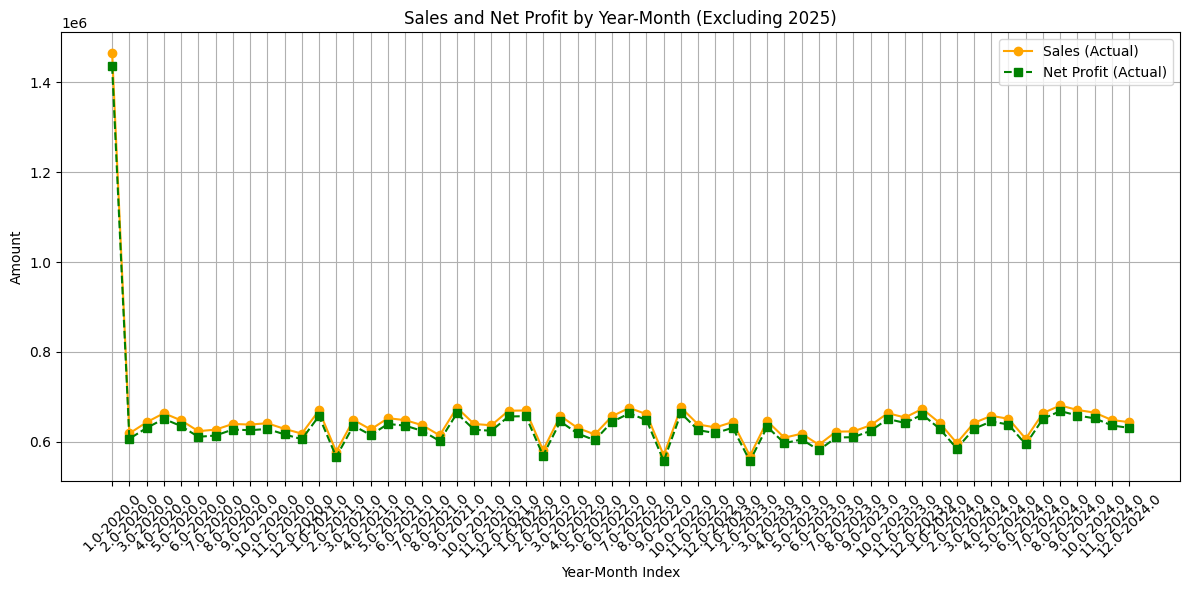

In [26]:
df_profit=df['Netprofit'].sum()
df_profit.round(1)
df_filtered = df[df['Year'] != 2025]

df_grouped = df_filtered.groupby(['Year', 'Month']).agg(
    total_sales=('Sales', 'sum'),
    total_net_profit=('Netprofit', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(df_grouped.index, df_grouped['total_sales'], label='Sales (Actual)', marker='o', linestyle='-', color='orange')

plt.plot(df_grouped.index, df_grouped['total_net_profit'], label='Net Profit (Actual)', marker='s', linestyle='--', color='green')

plt.title('Sales and Net Profit by Year-Month (Excluding 2025)')
plt.xlabel('Year-Month Index')
plt.ylabel('Amount')
plt.xticks(df_grouped.index, [f'{row["Month"]}-{row["Year"]}' for _, row in df_grouped.iterrows()], rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

11. **Discount Breakdown by Country**
    
**Objective**:
To visualize the distribution of discounts across different countries.

**Boxplot Graph**: To enable observation of the central tendency, dispersion and possible outliers (different data) of discounts for each country.

**Axes**: Countries on the Y-axis and discount percentages on the X-axis.

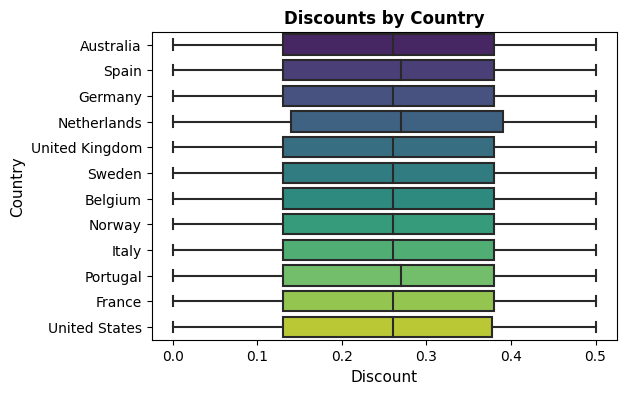

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x="Discount", y="Country",palette="viridis", showfliers=False)
plt.title("Discounts by Country", fontsize=12, weight='bold')
plt.xlabel("Discount", fontsize=11)
plt.ylabel("Country", fontsize=11)
plt.show()

12. **Average Shipping Cost by Provider**
    
**Objective**:
To visualize the average shipping costs of different shipping providers.

**Bar Chart**: Compares the average shipping cost of each fulfillment provider, allowing to see the highest and lowest costs.

**Axes**: Average shipping costs on the Y axis and fulfillment providers on the X axis.

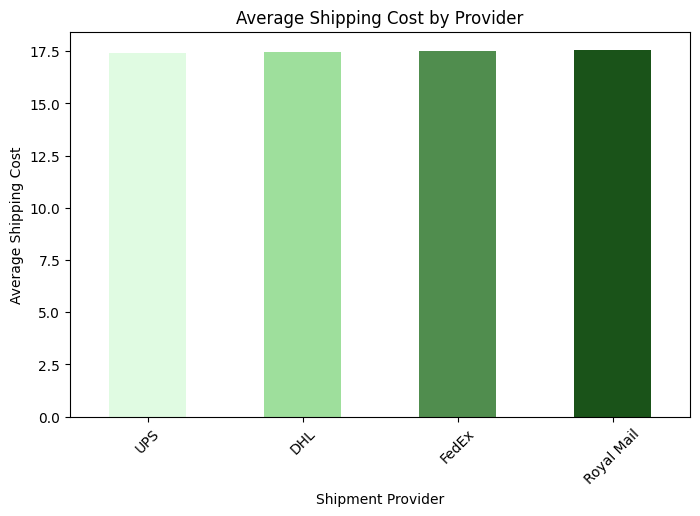

In [28]:
# Average shipping cost by provider
shipping_costs = df.groupby('ShipmentProvider')['ShippingCost'].mean().sort_values()

# Plot
plt.figure(figsize=(8, 5))
shipping_costs.plot(kind='bar', color=["#E0FBE2","#9EDF9C","#508D4E","#1A5319",'#88D66C'])
plt.title("Average Shipping Cost by Provider")
plt.ylabel("Average Shipping Cost")
plt.xlabel("Shipment Provider")
plt.xticks(rotation=45)
plt.show()

13. **Sales Channel and Returns**
    
**Objective**:
To visualize the relationship between transactions in different sales channels and returns.

**Stacked Bar Chart**: To compare “Returned” and “Non-Returned” transactions by sales channels.

**Axes**: The Y axis shows the number of transactions and the X axis shows the sales channels.

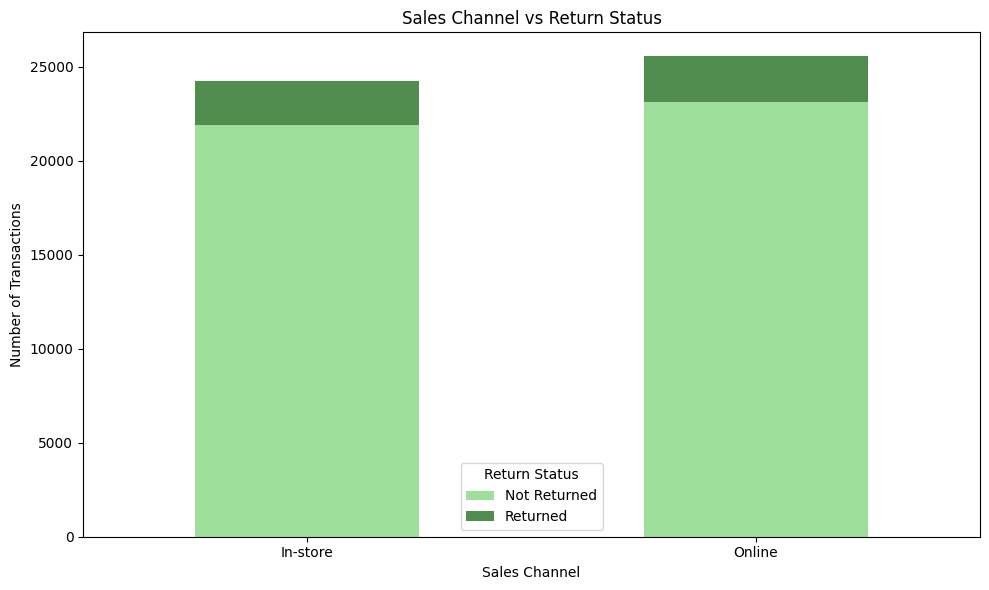

In [29]:
SalesChannel_Return = df.groupby(['SalesChannel', 'ReturnStatus']).size().unstack()

SalesChannel_Return.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#9EDF9C","#508D4E"])
plt.title("Average Shipping Cost by Provider")
plt.title('Sales Channel vs Return Status')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)  
plt.legend(title='Return Status', labels=['Not Returned', 'Returned'])
plt.tight_layout()
plt.show()

**MACHİNE LEARNİNG RECOMMENDATİONS**

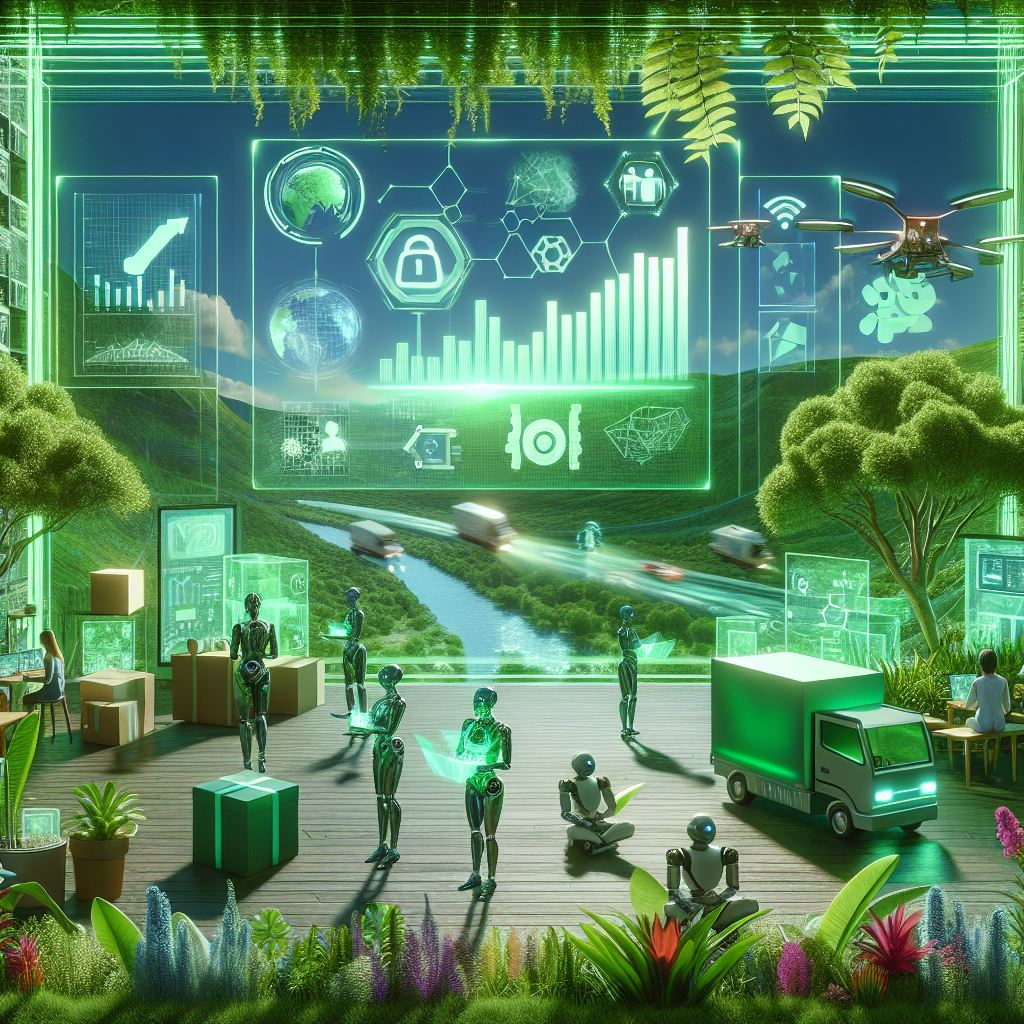

1. **Predictive Modeling**

**Sales Forecasting** :
* You can use regression models (Linear Regression, XGBoost) based on attributes such as “Quantity, Discount, UnitPrice, Category, Country” to forecast or aggregate sales 
* Target Variable: Quantity or Sales( Quantity * UnitPrice).

2. **Customer Segmentation**

**Clustering**:
* You can use KMeans or DBSCAN to segment customers based on purchase frequency, average spend and preferred categories. 
* Specifications: "Quantity, UnitPrice, Category, Country", etc.

3. **Customer Churn Forecasting**

**Classification** :
* Based on a customer's purchase history (e.g. time since last purchase, order frequency) you can predict the probability of losing a customer.
* Target Variable: An indicator of customer churn (can be derived from purchase patterns).
04. **Return Estimation**
   
**Classification** :
* You can use models such as Logistic Regression or Random Forest to predict whether a product will be returned (ReturnStatus).
* Attributes: "Category, ShipmentProvider, UnitPrice, Quantity"."n6
5. **Demand Forecasting**
   
**Time Series Analysis** :
* You can use ARIMA or LSTM to make sales forecasts (Quantity * UnitPrice) for inventory management.
* Input: Batch sales data “InvoiceDate”.

6. **Discount Optimization**
   
**Regression or Optimization Models** :
* You can predict the optimum level that will maximize sales without reducing profitability.
* Specifications: Category, UnitPrice, Quantity, Country, etc.tity.

**Machine Learning Example**

**Model Training and Word Cloud Visualization**

**Objective**:

**Random Forest Classifier Model**: Predicting the user's return status
Stages:
* Divide the data into training and test sets.
* Training the model and making predictions on the test set.
* Show the accuracy of the model and the classification report.
  
**Word Cloud**: To visualize frequently used words from the texts in the “Description” column.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Prepare the data
df['ReturnStatus'] = df['ReturnStatus'].apply(lambda x: 1 if x == 'Returned' else 0)
features = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
X = df[features].fillna(0)
y = df['ReturnStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13551
           1       0.00      0.00      0.00      1384

    accuracy                           0.91     14935
   macro avg       0.45      0.50      0.48     14935
weighted avg       0.82      0.91      0.86     14935



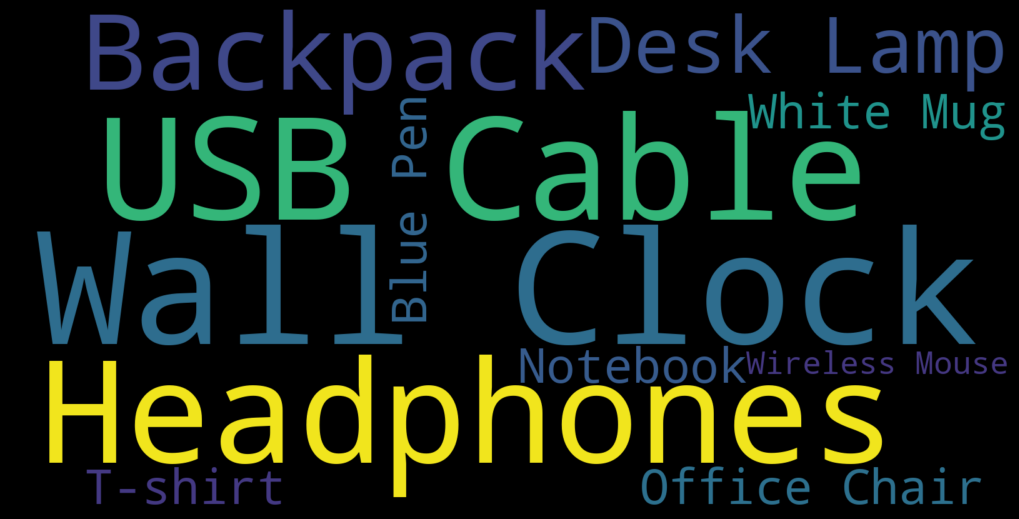

In [32]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Description"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**RECOMMENDATİONS**

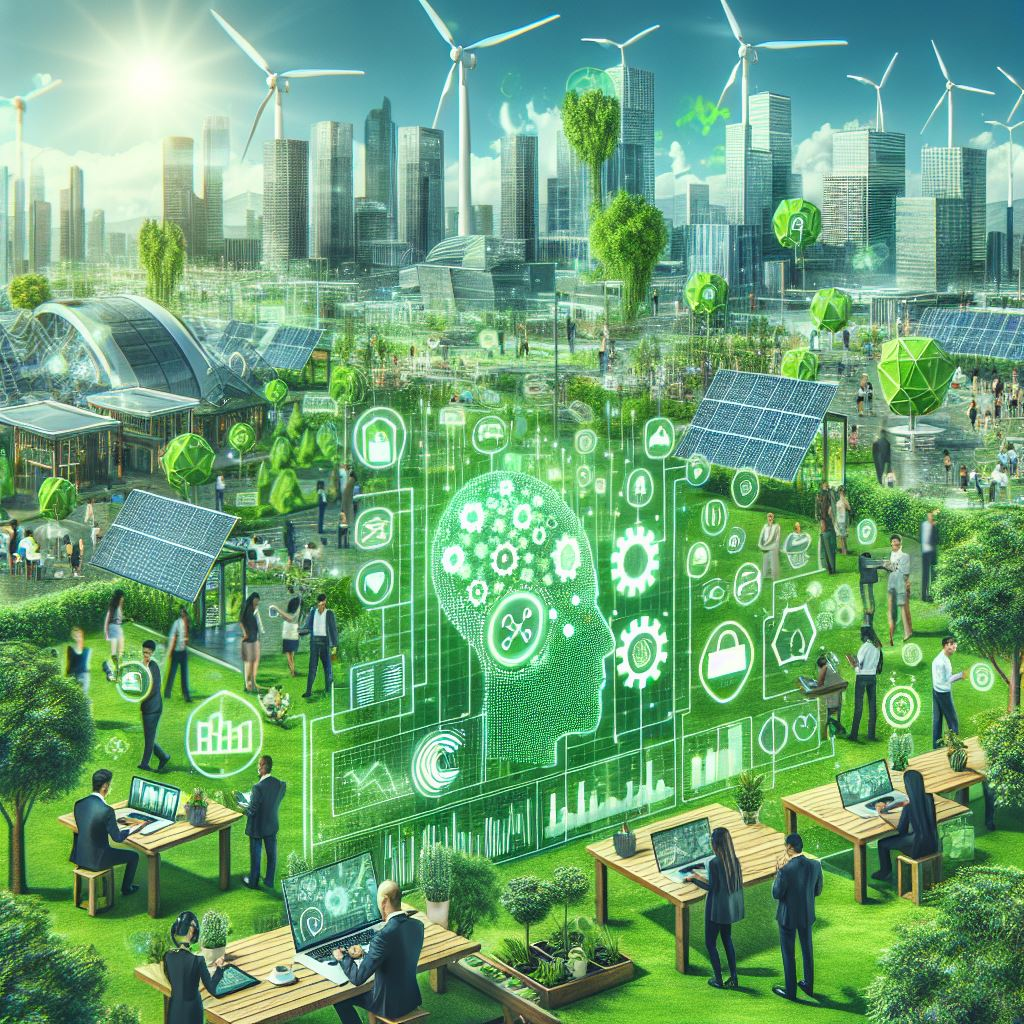

1. Operational Efficiency :

* Transportation costs can be reduced by comparing high-cost and low-performing transportation providers
* High-return products can be identified and quality or shipping procedures can be optimized.

2. Marketing Optimization :

* High-value customer clusters can be targeted with personalized offers using segmentation results.
* Discount strategies can be adjusted according to the impact on sales.

3. Future Enhancements :

* NLP models can be added to analyze customer comments if possible.
* Reinforcement learning can be applied for dynamic pricing optimization.
 (free version)